# stock prediction using LSTM

## Importing the required libraries





In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

## Downloading google stock data using yfinance 

In [3]:
data = yf.download("GOOGL" , start = "2019-01-01" , interval = '1d')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,51.360001,53.039501,51.264000,52.734001,52.734001,31868000
2019-01-03,52.533501,53.313000,51.118500,51.273499,51.273499,41960000
2019-01-04,52.127998,54.000000,51.842999,53.903500,53.903500,46022000
2019-01-07,54.048500,54.134998,53.132000,53.796001,53.796001,47446000
2019-01-08,54.299999,54.667500,53.417500,54.268501,54.268501,35414000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 941 entries, 2019-01-02 to 2022-09-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       941 non-null    float64
 1   High       941 non-null    float64
 2   Low        941 non-null    float64
 3   Close      941 non-null    float64
 4   Adj Close  941 non-null    float64
 5   Volume     941 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 51.5 KB


In [5]:
# checking for any duplicate values
data.duplicated().any()

False

In [6]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')

In [7]:
data.isnull().sum().sum()

0

In [8]:
# Get the statistics of the data
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,941.000000,941.000000,941.000000,941.000000,941.000000,9.410000e+02
mean,92.908635,93.915499,91.896454,92.934592,92.934592,3.400962e+07
std,31.161472,31.445069,30.778178,31.092989,31.092989,1.558321e+07
min,51.360001,52.500000,50.443501,51.273499,51.273499,7.842567e+06
25%,63.286999,63.787498,62.598499,63.215000,63.215000,2.412600e+07
50%,86.337997,87.299500,85.509003,86.380997,86.380997,3.039200e+07
75%,119.100998,120.208000,117.813004,119.015503,119.015503,3.841200e+07
max,151.250000,151.546494,148.899002,149.838501,149.838501,1.331780e+08


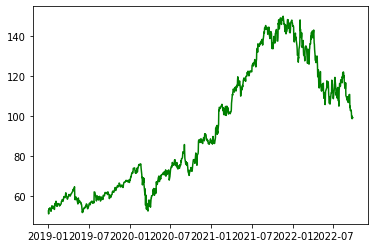

In [9]:
# plot the 'Close' feature  
plt.plot(data.index, data['Close'], color = 'green', label = 'Close')
plt.show()

## Data processing

In [10]:
# saving 'Close' feature in a variable name dataV1, since we only need that
dataV1 = data.iloc[:,3:4]
dataV1 = dataV1.values
dataV1.shape

(941, 1)

In [11]:
from sklearn.preprocessing import MinMaxScaler

# normalizing the data
Scaler = MinMaxScaler(feature_range=(0,1))
dataV1 = Scaler.fit_transform(dataV1)
dataV1.shape

(941, 1)

In [12]:
# declaring feature length
feature_length = 100

In [13]:
# Function to create x and y data
def Create_Features_and_Targets(data, feature_length):
  X = list()
  Y = list()
  for i in range(len(data) - feature_length -1):
    X.append(data[i:(i + feature_length), 0])
    Y.append(data[i + feature_length, 0])
  X = np.array(X)
  Y = np.array(Y)
  return X,Y

In [14]:
X_train, y_train = Create_Features_and_Targets(dataV1, feature_length)

In [15]:
# Making data 3 dimensional
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [16]:
X_train.shape, y_train.shape

((840, 100, 1), (840,))

## Creating the model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , LSTM

In [18]:
# model
model = Sequential([
    LSTM(100, return_sequences = True, input_shape =(X_train.shape[1],1)),
    Dropout(0.3),

    LSTM(100, return_sequences = False),
    Dropout(0.3),
    Dense(1),
])
model.compile(optimizer='adam',loss="mean_squared_error")

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 100)          40800     
                                                                 
 dropout (Dropout)           (None, 100, 100)          0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Training the model
history = model.fit(
    X_train, 
    y_train, 
    epochs = 100, 
    batch_size = 12, 
    verbose=1,
)

Epoch 1/100
70/70 [==============================] - 14s 149ms/step - loss: 0.0244
Epoch 2/100
70/70 [==============================] - 10s 138ms/step - loss: 0.0041
Epoch 3/100
70/70 [==============================] - 7s 94ms/step - loss: 0.0040
Epoch 4/100
70/70 [==============================] - 7s 97ms/step - loss: 0.0035
Epoch 5/100
70/70 [==============================] - 7s 96ms/step - loss: 0.0040
Epoch 6/100
70/70 [==============================] - 7s 96ms/step - loss: 0.0038
Epoch 7/100
70/70 [==============================] - 7s 96ms/step - loss: 0.0036
Epoch 8/100
70/70 [==============================] - 7s 96ms/step - loss: 0.0031
Epoch 9/100
70/70 [==============================] - 7s 96ms/step - loss: 0.0033
Epoch 10/100
70/70 [==============================] - 7s 96ms/step - loss: 0.0034
Epoch 11/100
70/70 [==============================] - 7s 97ms/step - loss: 0.0033
Epoch 12/100
70/70 [==============================] - 7s 95ms/step - loss: 0.0031
Epoch 13/100
70/70 [=

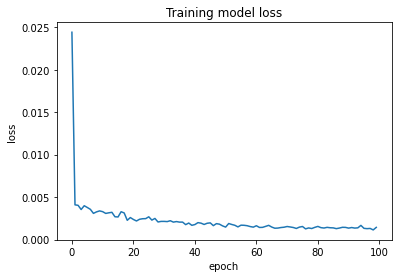

In [21]:
# plotting the loss from the training model
plt.plot(history.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

## Testing and making predictions

In [22]:
testData = data.iloc[:,3:4] # Get 'Close' feature
y_real = testData.iloc[feature_length+1:,0:].values # Actual Stock values
x_test = testData.iloc[:,0:].values  # values from whole data to test
y_real.shape, x_test.shape

((840, 1), (941, 1))

In [23]:
# normalizing the Data using Scaler.transform function
x_test = Scaler.transform(x_test)
x_test.shape

(941, 1)

In [24]:
x_test, y_test = Create_Features_and_Targets(x_test, feature_length)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1)) # Making data 3 dimensional 
x_test.shape

(840, 100, 1)

In [25]:
# making predictions
y_pred = model.predict(x_test)

In [26]:
predicted_price = Scaler.inverse_transform(y_pred)

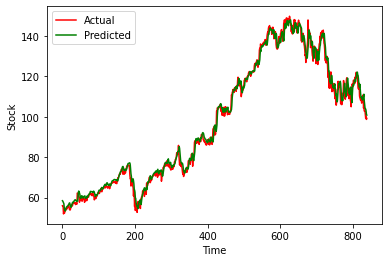

In [27]:
# plotting the Actual Stock Price and the Predicted Stock Price
plt.plot(y_real, color = 'red', label = 'Actual')
plt.plot(predicted_price, color = 'green', label = 'Predicted')

plt.xlabel('Time')
plt.ylabel('Stock')
plt.legend()
plt.show()

## Real-time predictions

In [28]:
def predict_given_date(data, date, feature_length):
  if date not in data.index:
    data.loc[pd.Timestamp(date)] = 0
  idx = data.index.get_loc(date)
  close_col = data.iloc[:,3:4]
  close_col = close_col.iloc[idx - feature_length : idx,:].values
  close_col = np.expand_dims(Scaler.transform(close_col) , axis = 0)
  Prediction = model.predict(close_col)
  Prediction = Scaler.inverse_transform(Prediction)
  return Prediction

In [34]:
predict_given_date(data, '2022-09-20', feature_length)

array([[103.89344]], dtype=float32)

Here we can see our model predicted '101.7007' to the given data which is 2022-09-20, well lets check if its any closer to the actuval price value of that given date. This peace of code do just that.

In [35]:
# only gives the dates that already exists in the dataset
l = data.index.get_loc('2022-09-20')
data.iloc[l: l+1,:]['Close']
# well we can see the predicted value is very close

Date
2022-09-20    101.139999
Name: Close, dtype: float64